Creating the enviornment to load the file on the google drive and reading the file in the variable **prices_raw**



In [34]:
import numpy as np
import pandas as pd 

prices_raw = pd.read_csv('Prices_raw.csv')

In [35]:
prices_raw.shape

(231154, 36)

In [36]:
# parse timestamps correctly
for t in [u'date' , u'ebsMarketUpdateTime', u'feedHandlerPublishTime', u'feedHandlerReceiveTime', u'eventCaptureTime']:
    prices_raw[t] = pd.to_datetime(prices_raw[t])
    
print("First three rows of raw data")
prices_raw.head(3)

First three rows of raw data


,Unnamed: 0,index,date,sym,time,siteCode,instrument,status,ebsReferenceTime,ebsMarketUpdateTime,feedHandlerReceiveTime,feedHandlerPublishTime,eventCaptureTime,bid,ask,paid,given,bidRegular,askRegular,regularSize,bid2,bid3,bidSize1,bidSize2,bidSize3,numberBidMaker1,numberBidMaker2,numberBidMaker3,ask2,ask3,askSize1,askSize2,askSize3,numberAskMaker1,numberAskMaker2,numberAskMaker3
0,0,0,2017-09-15,USDINR,0 days 03:00:15.501000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:15.341,2017-09-15 03:00:15.341,2017-09-15 03:00:15.341,2017-09-15 03:00:15.362,64.36,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.405,64.520,1000000,1000000,22000000,1,1,1
1,1,1,2017-09-15,USDINR,0 days 03:00:15.901000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:15.841,2017-09-15 03:00:15.841,2017-09-15 03:00:15.841,2017-09-15 03:00:15.862,64.36,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.400,64.405,1000000,1000000,1000000,1,1,1
2,2,2,2017-09-15,USDINR,0 days 03:00:24.706000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:24.594,2017-09-15 03:00:24.594,2017-09-15 03:00:24.594,2017-09-15 03:00:24.635,64.36,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.400,64.410,1000000,1000000,1000000,1,1,1


In [37]:
# creating various time related variable 
prices_raw["DayOfMonth"] = prices_raw["feedHandlerReceiveTime"].apply(lambda x: x.day)
prices_raw["Hour"]       = prices_raw["feedHandlerReceiveTime"].apply(lambda x: x.hour)
prices_raw["Minutes"]    = prices_raw["feedHandlerReceiveTime"].apply(lambda x: x.minute)
prices_raw["Seconds"]    = prices_raw["feedHandlerReceiveTime"].apply(lambda x: x.second)
prices_raw["WeekDay"]    = prices_raw["feedHandlerReceiveTime"].apply(lambda x: x.weekday())
prices_raw["DayOfYear"]  = prices_raw["feedHandlerReceiveTime"].apply(lambda x: x.timetuple().tm_yday)
prices_raw["time_diff"]   = prices_raw["feedHandlerReceiveTime"] - prices_raw["feedHandlerReceiveTime"].shift(1)

In [38]:
prices_raw.head()

,Unnamed: 0,index,date,sym,time,siteCode,instrument,status,ebsReferenceTime,ebsMarketUpdateTime,feedHandlerReceiveTime,feedHandlerPublishTime,eventCaptureTime,bid,ask,paid,given,bidRegular,askRegular,regularSize,bid2,bid3,bidSize1,bidSize2,bidSize3,numberBidMaker1,numberBidMaker2,numberBidMaker3,ask2,ask3,askSize1,askSize2,askSize3,numberAskMaker1,numberAskMaker2,numberAskMaker3,DayOfMonth,Hour,Minutes,Seconds,WeekDay,DayOfYear,time_diff
0,0,0,2017-09-15,USDINR,0 days 03:00:15.501000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:15.341,2017-09-15 03:00:15.341,2017-09-15 03:00:15.341,2017-09-15 03:00:15.362,64.360,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.405,64.520,1000000,1000000,22000000,1,1,1,15,3,0,15,4,258,NaT
1,1,1,2017-09-15,USDINR,0 days 03:00:15.901000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:15.841,2017-09-15 03:00:15.841,2017-09-15 03:00:15.841,2017-09-15 03:00:15.862,64.360,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.400,64.405,1000000,1000000,1000000,1,1,1,15,3,0,15,4,258,00:00:00.500000
2,2,2,2017-09-15,USDINR,0 days 03:00:24.706000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:24.594,2017-09-15 03:00:24.594,2017-09-15 03:00:24.594,2017-09-15 03:00:24.635,64.360,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.400,64.410,1000000,1000000,1000000,1,1,1,15,3,0,24,4,258,00:00:08.753000
3,3,3,2017-09-15,USDINR,0 days 03:00:25.706000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:25.594,2017-09-15 03:00:25.595,2017-09-15 03:00:25.595,2017-09-15 03:00:25.627,64.360,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.400,64.410,1000000,1000000,2000000,1,1,1,15,3,0,25,4,258,00:00:01.001000
4,4,4,2017-09-15,USDINR,0 days 03:00:26.307000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:26.094,2017-09-15 03:00:26.094,2017-09-15 03:00:26.094,2017-09-15 03:00:26.135,64.365,64.37,NaN,0.0,NaN,NaN,NaN,64.36,64.33,1000000,1000000,1000000,1,1,1,64.400,64.410,1000000,1000000,2000000,1,1,1,15,3,0,26,4,258,00:00:00.499000


In [39]:
# function to extract the total seconds from a timedelta object 
def convert_time_to_number(time_delta):
  return time_delta.total_seconds()

In [40]:
# creating a consecutive time difference column 
prices_raw["time_diff"] = prices_raw["time_diff"].apply(convert_time_to_number)

In [41]:
# set the first value of this column to zero
prices_raw["time_diff"][0] = 0.0
# next we creat elapsed time variable which is defined as the total time elapsed from the beginning 
prices_raw["elapsed_time"] = prices_raw["time_diff"].cumsum()
# We also consider the square of the elpased time 
prices_raw["elapsed_time_sq"] = prices_raw["elapsed_time"]**2
prices_raw.head()

,Unnamed: 0,index,date,sym,time,siteCode,instrument,status,ebsReferenceTime,ebsMarketUpdateTime,feedHandlerReceiveTime,feedHandlerPublishTime,eventCaptureTime,bid,ask,paid,given,bidRegular,askRegular,regularSize,bid2,bid3,bidSize1,bidSize2,bidSize3,numberBidMaker1,numberBidMaker2,numberBidMaker3,ask2,ask3,askSize1,askSize2,askSize3,numberAskMaker1,numberAskMaker2,numberAskMaker3,DayOfMonth,Hour,Minutes,Seconds,WeekDay,DayOfYear,time_diff,elapsed_time,elapsed_time_sq
0,0,0,2017-09-15,USDINR,0 days 03:00:15.501000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:15.341,2017-09-15 03:00:15.341,2017-09-15 03:00:15.341,2017-09-15 03:00:15.362,64.360,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.405,64.520,1000000,1000000,22000000,1,1,1,15,3,0,15,4,258,0.000,0.000,0.000000
1,1,1,2017-09-15,USDINR,0 days 03:00:15.901000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:15.841,2017-09-15 03:00:15.841,2017-09-15 03:00:15.841,2017-09-15 03:00:15.862,64.360,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.400,64.405,1000000,1000000,1000000,1,1,1,15,3,0,15,4,258,0.500,0.500,0.250000
2,2,2,2017-09-15,USDINR,0 days 03:00:24.706000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:24.594,2017-09-15 03:00:24.594,2017-09-15 03:00:24.594,2017-09-15 03:00:24.635,64.360,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.400,64.410,1000000,1000000,1000000,1,1,1,15,3,0,24,4,258,8.753,9.253,85.618009
3,3,3,2017-09-15,USDINR,0 days 03:00:25.706000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:25.594,2017-09-15 03:00:25.595,2017-09-15 03:00:25.595,2017-09-15 03:00:25.627,64.360,64.37,NaN,0.0,NaN,NaN,NaN,64.33,64.31,1000000,1000000,1000000,1,1,1,64.400,64.410,1000000,1000000,2000000,1,1,1,15,3,0,25,4,258,1.001,10.254,105.144516
4,4,4,2017-09-15,USDINR,0 days 03:00:26.307000000,LOH,USDINR1M=EBSNDF,ok,NaN,2017-09-15 03:00:26.094,2017-09-15 03:00:26.094,2017-09-15 03:00:26.094,2017-09-15 03:00:26.135,64.365,64.37,NaN,0.0,NaN,NaN,NaN,64.36,64.33,1000000,1000000,1000000,1,1,1,64.400,64.410,1000000,1000000,2000000,1,1,1,15,3,0,26,4,258,0.499,10.753,115.627009


In [42]:
prices = prices_raw[['DayOfMonth','Hour','WeekDay','Minutes','Seconds','time_diff','elapsed_time','elapsed_time_sq',
                     'date','bid','ask','bid2','ask2','bidSize1','askSize1','bidSize2','askSize2','paid', 'given']]

prices['bid'] = prices['bid'].replace(0,np.NaN)
prices['ask'] = prices['ask'].replace(0,np.NaN)
prices['bid2'] = prices['bid2'].replace(0,np.NaN)
prices['ask2'] = prices['ask2'].replace(0,np.NaN)

prices['paid'] = prices['paid'].replace(0,np.NaN)
prices['given'] = prices['given'].replace(0,np.NaN)
prices['mid'] =  prices['ask']
prices['mid'] = 0.5*(prices['bid'] + prices['mid'])

prices.index = prices_raw.feedHandlerReceiveTime

In [43]:
prices.head()

,DayOfMonth,Hour,WeekDay,Minutes,Seconds,time_diff,elapsed_time,elapsed_time_sq,date,bid,ask,bid2,ask2,bidSize1,askSize1,bidSize2,askSize2,paid,given,mid
feedHandlerReceiveTime,,,,,,,,,,,,,,,,,,,,
2017-09-15 03:00:15.341,15,3,4,0,15,0.000,0.000,0.000000,2017-09-15,64.360,64.37,64.33,64.405,1000000,1000000,1000000,1000000,NaN,NaN,64.3650
2017-09-15 03:00:15.841,15,3,4,0,15,0.500,0.500,0.250000,2017-09-15,64.360,64.37,64.33,64.400,1000000,1000000,1000000,1000000,NaN,NaN,64.3650
2017-09-15 03:00:24.594,15,3,4,0,24,8.753,9.253,85.618009,2017-09-15,64.360,64.37,64.33,64.400,1000000,1000000,1000000,1000000,NaN,NaN,64.3650
2017-09-15 03:00:25.595,15,3,4,0,25,1.001,10.254,105.144516,2017-09-15,64.360,64.37,64.33,64.400,1000000,1000000,1000000,1000000,NaN,NaN,64.3650
2017-09-15 03:00:26.094,15,3,4,0,26,0.499,10.753,115.627009,2017-09-15,64.365,64.37,64.36,64.400,1000000,1000000,1000000,1000000,NaN,NaN,64.3675


In [44]:
prices=prices.drop_duplicates()

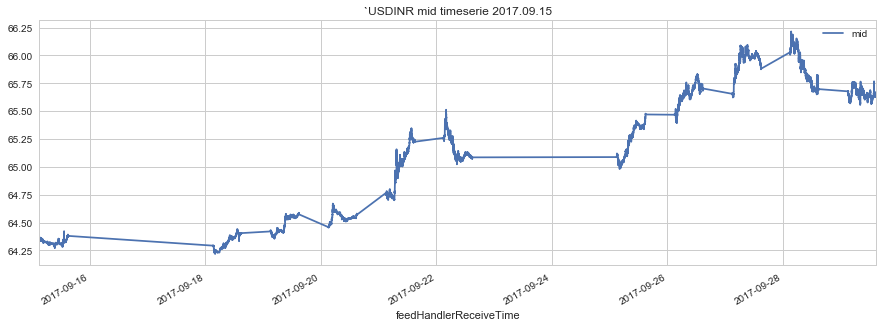

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 100

from_date = '2017.09.15'
to_date = '2017.09.30'
start_time = '03:00'
end_time = '15:00'

sym = '`USDINR'
site = "`LOH"

date = '2017.09.15'
prices['date'] = pd.to_datetime(prices.date)
prices[['mid']].plot(figsize=(15,5), title=sym+ ' mid timeserie '+date)
plt.show()

In [46]:
columns = ['bid','ask','bid2','ask2','bidSize1','askSize1','bidSize2','askSize2','mid']
prices_delta = prices[columns] - prices[columns].shift(1)
prices_delta.rename(columns = {'mid':'deltaMid','bid':'deltaBid','ask':'deltaAsk','bidSize1':'deltaBidSize1','askSize1':'deltaAskSize1',
                              'bidSize2':'deltaBidSize2','askSize2':'deltaAskSize2'}, inplace=True)

# add back old prices, and a midDiff for learning later
LL = ['mid','bid','ask','bidSize1','bidSize2','askSize1','askSize2']
prices_delta[LL] = prices[LL]
prices_delta['midDiffInterval'] = (prices_delta['deltaMid'] != 0).cumsum()

In [47]:
add_col = ['DayOfMonth','Hour','WeekDay','Minutes','Seconds','time_diff','elapsed_time', 'elapsed_time_sq']
prices_delta[add_col] = prices[add_col]

In [48]:
prices_delta.head()

,deltaBid,deltaAsk,bid2,ask2,deltaBidSize1,deltaAskSize1,deltaBidSize2,deltaAskSize2,deltaMid,mid,bid,ask,bidSize1,bidSize2,askSize1,askSize2,midDiffInterval,DayOfMonth,Hour,WeekDay,Minutes,Seconds,time_diff,elapsed_time,elapsed_time_sq
feedHandlerReceiveTime,,,,,,,,,,,,,,,,,,,,,,,,,
2017-09-15 03:00:15.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.3650,64.360,64.37,1000000,1000000,1000000,1000000,1,15,3,4,0,15,0.000,0.000,0.000000
2017-09-15 03:00:15.841,0.000,0.0,0.00,-0.005,0.0,0.0,0.0,0.0,0.0000,64.3650,64.360,64.37,1000000,1000000,1000000,1000000,1,15,3,4,0,15,0.500,0.500,0.250000
2017-09-15 03:00:24.594,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0000,64.3650,64.360,64.37,1000000,1000000,1000000,1000000,1,15,3,4,0,24,8.753,9.253,85.618009
2017-09-15 03:00:25.595,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0000,64.3650,64.360,64.37,1000000,1000000,1000000,1000000,1,15,3,4,0,25,1.001,10.254,105.144516
2017-09-15 03:00:26.094,0.005,0.0,0.03,0.000,0.0,0.0,0.0,0.0,0.0025,64.3675,64.365,64.37,1000000,1000000,1000000,1000000,2,15,3,4,0,26,0.499,10.753,115.627009


In [49]:
# time feature (on feedHandlerRecieve), date,time ... 
prices_delta['date'] = prices.date
prices_delta['time'] = prices.index

# trade Features, print,tradeSeq,lastPaid,lastGiven,bidToPaid,bidToGiven,midToPaid ...
atomicTrades = prices[['paid','given']].loc[(prices['paid']>1) | (prices['given']>1)]
atomicTrades.loc[atomicTrades['paid'] <1, 'paid' ] = np.NaN
atomicTrades.loc[atomicTrades['given'] <1, 'given' ] = np.NaN
atomicTrades = atomicTrades.replace(0,np.NaN)
prices_delta['paid'] = atomicTrades['paid']
prices_delta['given'] = atomicTrades['given']
prices_delta['print'] = np.where((prices_delta['paid']>1) | (prices_delta['given']>1),1,0)
prices_delta['tradeSeq'] = prices_delta['print'].cumsum()
prices_delta['lastPaid'] = prices_delta['paid'].ffill()
prices_delta['lastGiven'] = prices_delta['given'].ffill()
prices_delta.drop('paid',1,inplace=True)
prices_delta.drop('given',1,inplace=True)
prices_delta['midToPaid'] = prices_delta['mid'] - prices_delta['lastPaid']
prices_delta['midToGiven'] = prices_delta['mid'] - prices_delta['lastGiven']
prices_delta['bidToPaid'] = prices_delta['bid'] - prices_delta['lastPaid']
prices_delta['bidToGiven'] = prices_delta['bid'] - prices_delta['lastGiven']
prices_delta['askToPaid'] = prices_delta['ask'] - prices_delta['lastPaid']
prices_delta['askToGiven'] = prices_delta['ask'] - prices_delta['lastGiven']

# book preasure feature
prices['book_pressure'] = prices['mid'] - (prices['bidSize1']*prices['bid'] + prices['askSize1']*prices['ask'])/(prices['bidSize1']+prices['askSize1'])
prices_delta['book_pressure'] = prices['mid'] - (prices['bidSize1']*prices['bid'] + prices['askSize1']*prices['ask'])/(prices['bidSize1']+prices['askSize1'])


# spread feature
prices_delta['spread'] = prices_delta['ask'] - prices_delta['bid']

# create feature to learn, ie next move (not to be used as covariates!)
prices_delta['midDiff'] = prices_delta['mid'].diff()
prices_delta['nextMidDiff'] = prices_delta['midDiff'].shift(-1)
prices_delta['nextMidVariation'] = prices_delta['nextMidDiff'].replace(to_replace=0, method='bfill')

prices_delta.dropna(inplace=True)

In [50]:
prices_delta.head()

,deltaBid,deltaAsk,bid2,ask2,deltaBidSize1,deltaAskSize1,deltaBidSize2,deltaAskSize2,deltaMid,mid,bid,ask,bidSize1,bidSize2,askSize1,askSize2,midDiffInterval,DayOfMonth,Hour,WeekDay,Minutes,Seconds,time_diff,elapsed_time,elapsed_time_sq,date,time,print,tradeSeq,lastPaid,lastGiven,midToPaid,midToGiven,bidToPaid,bidToGiven,askToPaid,askToGiven,book_pressure,spread,midDiff,nextMidDiff,nextMidVariation
feedHandlerReceiveTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-09-15 03:13:39.842,0.000,0.0,0.0,0.0,0.0,-1000000.0,0.0,0.0,0.0000,64.3550,64.345,64.365,2000000,1000000,2000000,1000000,8,15,3,4,13,39,45.501,804.501,647221.859001,2017-09-15,2017-09-15 03:13:39.842,1,2,64.365,64.36,-0.0100,-0.0050,-0.020,-0.015,0.0,0.005,-1.421085e-14,0.020,0.0000,0.0000,0.0025
2017-09-15 03:13:40.841,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,64.3550,64.345,64.365,2000000,1000000,2000000,1000000,8,15,3,4,13,40,0.999,805.500,648830.250000,2017-09-15,2017-09-15 03:13:40.841,0,2,64.365,64.36,-0.0100,-0.0050,-0.020,-0.015,0.0,0.005,-1.421085e-14,0.020,0.0000,0.0000,0.0025
2017-09-15 03:13:44.841,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,64.3550,64.345,64.365,2000000,1000000,2000000,1000000,8,15,3,4,13,44,4.000,809.500,655290.250000,2017-09-15,2017-09-15 03:13:44.841,0,2,64.365,64.36,-0.0100,-0.0050,-0.020,-0.015,0.0,0.005,-1.421085e-14,0.020,0.0000,0.0025,0.0025
2017-09-15 03:14:05.592,0.005,0.0,0.0,0.0,-1000000.0,0.0,0.0,0.0,0.0025,64.3575,64.350,64.365,1000000,1000000,2000000,1000000,9,15,3,4,14,5,20.751,830.251,689316.723001,2017-09-15,2017-09-15 03:14:05.592,0,2,64.365,64.36,-0.0075,-0.0025,-0.015,-0.010,0.0,0.005,-2.500000e-03,0.015,0.0025,0.0025,0.0025
2017-09-15 03:14:33.842,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0025,64.3600,64.355,64.365,1000000,1000000,2000000,1000000,10,15,3,4,14,33,28.250,858.501,737023.967001,2017-09-15,2017-09-15 03:14:33.842,0,2,64.365,64.36,-0.0050,0.0000,-0.010,-0.005,0.0,0.005,-1.666667e-03,0.010,0.0025,0.0000,-0.0050


In [51]:
from scipy import stats
prices_delta = prices_delta.replace(0,np.NaN)
prices_delta = prices_delta.replace(np.NaN,0)
prices_delta_clean = prices_delta[(np.abs(stats.zscore(prices_delta['deltaMid'])) < 5)]
prices_delta_clean = prices_delta_clean.replace(0,np.NaN)
prices_delta_clean = prices_delta_clean.replace(np.NaN,0)

In [52]:
print prices_delta_clean.apply(lambda x: sum(x.isnull()))

deltaBid            0
deltaAsk            0
bid2                0
ask2                0
deltaBidSize1       0
deltaAskSize1       0
deltaBidSize2       0
deltaAskSize2       0
deltaMid            0
mid                 0
bid                 0
ask                 0
bidSize1            0
bidSize2            0
askSize1            0
askSize2            0
midDiffInterval     0
DayOfMonth          0
Hour                0
WeekDay             0
Minutes             0
Seconds             0
time_diff           0
elapsed_time        0
elapsed_time_sq     0
date                0
time                0
print               0
tradeSeq            0
lastPaid            0
lastGiven           0
midToPaid           0
midToGiven          0
bidToPaid           0
bidToGiven          0
askToPaid           0
askToGiven          0
book_pressure       0
spread              0
midDiff             0
nextMidDiff         0
nextMidVariation    0
dtype: int64


In [57]:
prices_delta_clean.head()

,deltaBid,deltaAsk,bid2,ask2,deltaBidSize1,deltaAskSize1,deltaBidSize2,deltaAskSize2,deltaMid,mid,bid,ask,bidSize1,bidSize2,askSize1,askSize2,midDiffInterval,DayOfMonth,Hour,WeekDay,Minutes,Seconds,time_diff,elapsed_time,elapsed_time_sq,date,time,print,tradeSeq,lastPaid,lastGiven,midToPaid,midToGiven,bidToPaid,bidToGiven,askToPaid,askToGiven,book_pressure,spread,midDiff,nextMidDiff,nextMidVariation
feedHandlerReceiveTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-09-15 03:13:39.842,0.000,0.0,0.0,0.0,0.0,-1000000.0,0.0,0.0,0.0000,64.3550,64.345,64.365,2000000,1000000,2000000,1000000,8,15,3,4.0,13.0,39.0,45.501,804.501,647221.859001,2017-09-15,2017-09-15 03:13:39.842,1.0,2,64.365,64.36,-0.0100,-0.0050,-0.020,-0.015,0.0,0.005,-1.421085e-14,0.020,0.0000,0.0000,0.0025
2017-09-15 03:13:40.841,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,64.3550,64.345,64.365,2000000,1000000,2000000,1000000,8,15,3,4.0,13.0,40.0,0.999,805.500,648830.250000,2017-09-15,2017-09-15 03:13:40.841,0.0,2,64.365,64.36,-0.0100,-0.0050,-0.020,-0.015,0.0,0.005,-1.421085e-14,0.020,0.0000,0.0000,0.0025
2017-09-15 03:13:44.841,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,64.3550,64.345,64.365,2000000,1000000,2000000,1000000,8,15,3,4.0,13.0,44.0,4.000,809.500,655290.250000,2017-09-15,2017-09-15 03:13:44.841,0.0,2,64.365,64.36,-0.0100,-0.0050,-0.020,-0.015,0.0,0.005,-1.421085e-14,0.020,0.0000,0.0025,0.0025
2017-09-15 03:14:05.592,0.005,0.0,0.0,0.0,-1000000.0,0.0,0.0,0.0,0.0025,64.3575,64.350,64.365,1000000,1000000,2000000,1000000,9,15,3,4.0,14.0,5.0,20.751,830.251,689316.723001,2017-09-15,2017-09-15 03:14:05.592,0.0,2,64.365,64.36,-0.0075,-0.0025,-0.015,-0.010,0.0,0.005,-2.500000e-03,0.015,0.0025,0.0025,0.0025
2017-09-15 03:14:33.842,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0025,64.3600,64.355,64.365,1000000,1000000,2000000,1000000,10,15,3,4.0,14.0,33.0,28.250,858.501,737023.967001,2017-09-15,2017-09-15 03:14:33.842,0.0,2,64.365,64.36,-0.0050,0.0000,-0.010,-0.005,0.0,0.005,-1.666667e-03,0.010,0.0025,0.0000,-0.0050


Select the features that are going to be included in the model

In [58]:
features = ['deltaBid','deltaAsk','deltaMid','midToPaid','midToGiven',
            'bidSize1','askSize1','bidToPaid','askToGiven','bidToGiven',
            'askToPaid', 'book_pressure','spread','bid2','ask2',
            'DayOfMonth','Hour','WeekDay','Minutes','Seconds',
            'time_diff','elapsed_time','elapsed_time_sq',
            'bidSize2','askSize2','deltaBidSize2','deltaAskSize2'
           ]

OUT = (prices_delta_clean.date == '2017.09.29') | (prices_delta_clean.date == '2017.09.28') 
OUT = OUT | (prices_delta_clean.date == '2017.09.27') 
IN = ~OUT

X_train = np.array(prices_delta_clean[IN][features].values)
y_train = np.array(prices_delta_clean[IN]['nextMidVariation'].values)
X_test = np.array(prices_delta_clean[OUT][features].values)
y_test = np.array(prices_delta_clean[OUT]['nextMidVariation'].values)

y_train[y_train<0] = -1
y_train[y_train>0] = 1
y_test[y_test<0] = -1
y_test[y_test>0] = 1

### Different classification models for comparison

In [114]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# extreme gradient boosting parameters
xgb_params0={'colsample_bytree': 1.0, 'silent': 1, 'min_child_weight': 10,\
    'n_estimators': 3000, 'subsample': 1, 'learning_rate': 0.001, 'objective': 'binary:logistic',\
    'seed': 10, 'max_depth': 7, 'gamma': 0.0, 'eval_metric' : 'auc'}
xgb_params1={'colsample_bytree': 0.77, 'silent': 1, 'nthread': 8, 'min_child_weight': 15,\
    'n_estimators': 500, 'subsample': 0.77, 'learning_rate': 0.09, 'objective': 'binary:logistic',\
    'seed': 11, 'max_depth': 6, 'gamma': 0.2}
xgb_params2={'colsample_bytree': 1, 'silent': 1, 'nthread': 8, 'min_child_weight': 10,\
    'n_estimators': 500, 'subsample': 1, 'learning_rate': 0.095, 'objective': 'binary:logistic',\
    'seed': 10, 'max_depth': 7, 'gamma': 0.}
xgb_params3={'colsample_bytree': 1, 'silent': 1, 'nthread': 8, 'min_child_weight': 10,\
    'n_estimators': 300, 'subsample': 0.95, 'learning_rate': 0.07, 'objective': 'binary:logistic',\
    'seed': 10, 'max_depth': 7, 'gamma': 0.}

# extreme gradient boosting model
model = XGBClassifier(**xgb_params0)

# logistic regression model with L1 penalty

# model = LogisticRegression(C = 10, penalty='l1', tol=0.001)

# SVC model with RBF kernel
#model = SVC(kernel='rbf', C=1.0, decision_function_shape='ovr')

# Fit the algorithm
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, eval_metric='auc', gamma=0.0,
       learning_rate=0.001, max_delta_step=0, max_depth=7,
       min_child_weight=10, missing=None, n_estimators=3000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10, silent=1,
       subsample=1)

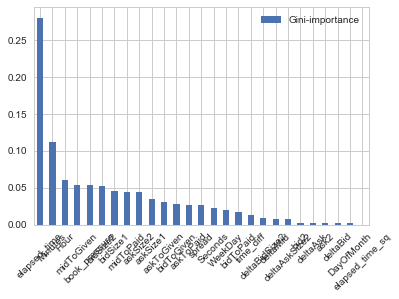

In [115]:
%matplotlib inline

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(prices_delta_clean[features].columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

# get the feature importances and plot them     
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending= False).plot(kind='bar', rot=45)

In [116]:
# make predictions on the test set 
predictions = model.predict(X_test)

/Users/Home/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [117]:
# print accuracy and classification report
from sklearn import metrics
print(metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

0.5893064703603255
             precision    recall  f1-score   support

       -1.0       0.60      0.55      0.57     36619
        1.0       0.58      0.63      0.60     35649

avg / total       0.59      0.59      0.59     72268



## Test accuracies of different models 

Logistic Regression model : 0.4932888692090552

Support vector machine with RBF kernel : 0.5639425471854763

Logistic Regression with L1 penalty (C = 10, tol = 0.001) : 0.5815160236895999

Extreme Gradient Boosting Trees : 0.5893064703603255